In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from embedding import embedding_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
import pandas as pd
import numpy as np

In [3]:
books = pd.read_csv("../../dataset/books/Preprocessed_data.csv")

C:\Users\82104\AppData\Local\Temp\ipykernel_3148\943819088.py:1: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("../../dataset/books/Preprocessed_data.csv")


In [4]:
books = books.loc[books.rating>0,:]

In [5]:
books_np = books.to_numpy()

In [6]:
books_np.shape

(352771, 15)

In [7]:
books.columns

Index(['user_id', 'age', 'location_match', 'isbn', 'year_of_publication',
       'language', 'category', 'country', 'location', 'rating', 'Language',
       'value', 'Unnamed: 12', 'Category', 'Unnamed: 14'],
      dtype='object')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 isbn (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 lan (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 category (InputLayer)          [(None, 1)]          0           []                               
                                                                                              

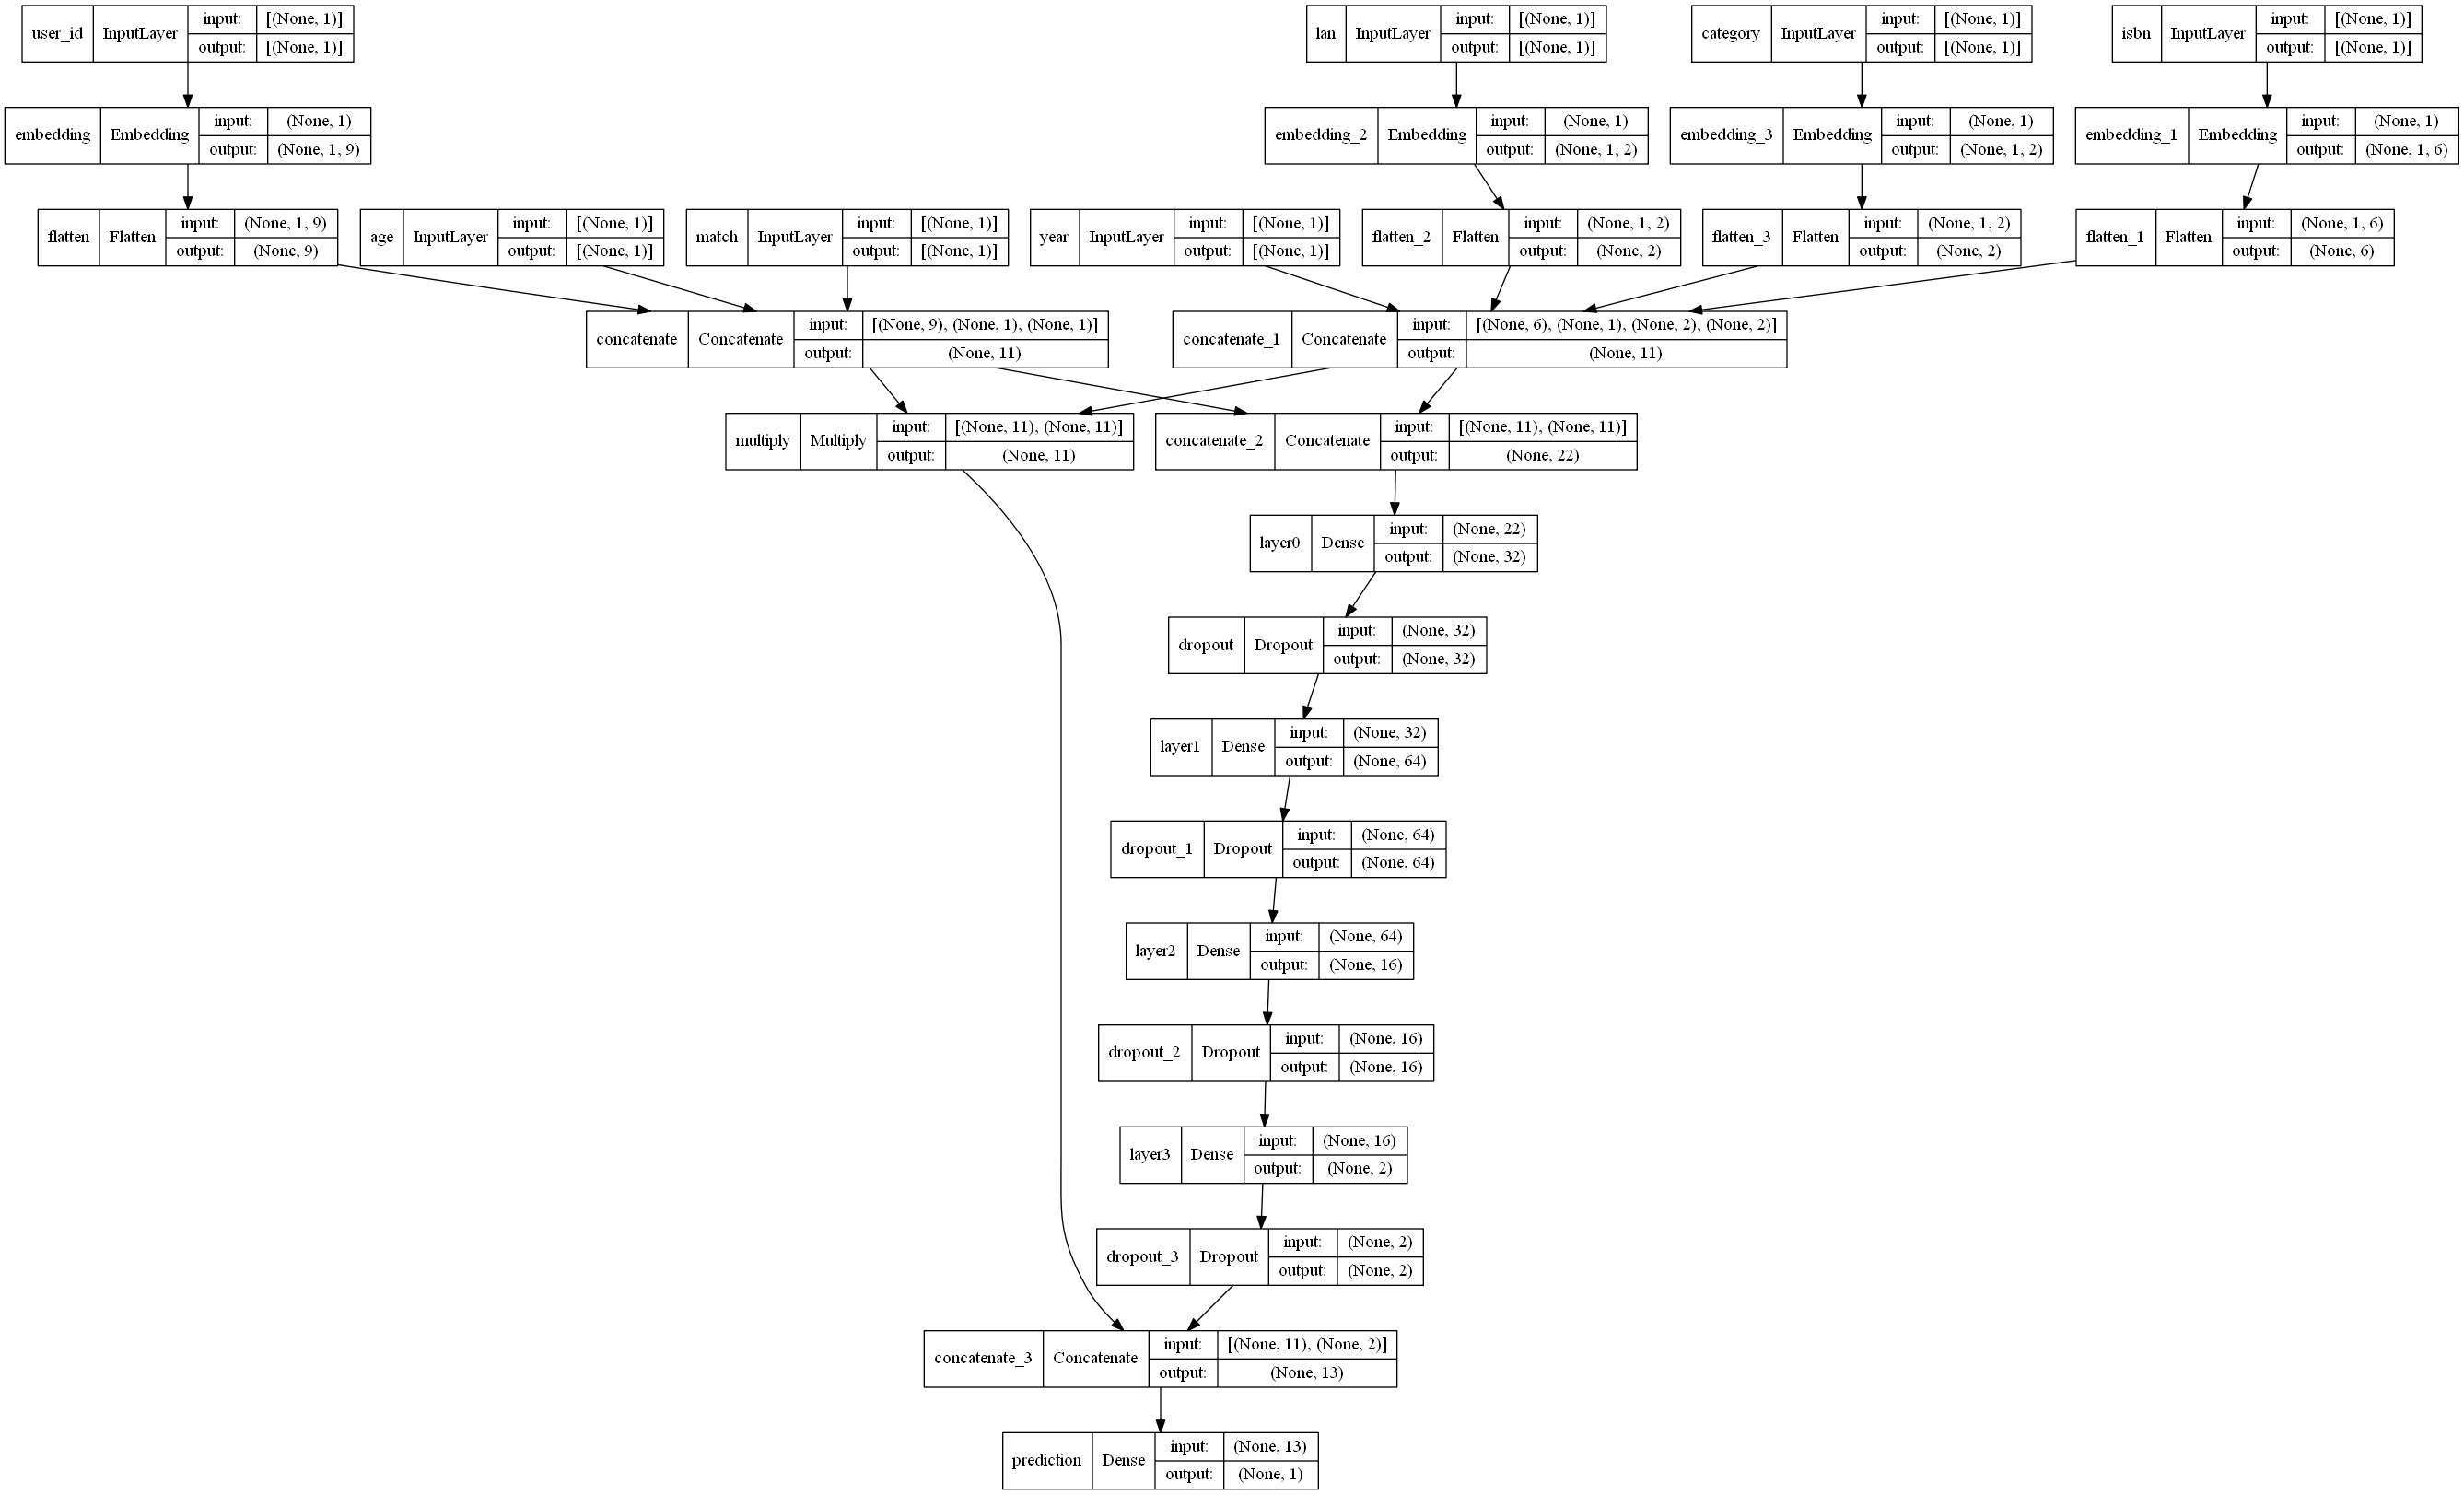

In [8]:
model = embedding_model()
model.summary()
plot_model(model, show_shapes=True)

In [9]:
dataset = books_np[:, :7].astype(float)
label = books_np[:, 9].astype(float)

In [10]:
# label = to_categorical(label)

In [11]:
dataset_train, dataset_val, label_train, label_val  = train_test_split(dataset, label, test_size=0.3, random_state=2022)

In [12]:
label

array([0.9, 0.9, 0.9, ..., 0.7, 0.6, 0.7])

In [13]:
label_train.shape

(246939,)

In [14]:
cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=20, verbose=1, mode='min',
    baseline=None, restore_best_weights=True
)
lr = 0.0001
loss = 'binary_crossentropy'
# loss = 'mse'
batch_size = 65536
model.compile(optimizer=Adam(learning_rate = lr), loss=loss, metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
history = model.fit([dataset_train[:,0],dataset_train[:,1], dataset_train[:,2], dataset_train[:,3], dataset_train[:,4], dataset_train[:,5], dataset_train[:,6]], label_train, epochs=200, batch_size = batch_size, validation_data=([dataset_val[:,0],dataset_val[:,1], dataset_val[:,2], dataset_val[:,3], dataset_val[:,4], dataset_val[:,5], dataset_val[:,6]], label_val),callbacks=[cb])

Epoch 1/200
4/4 [==============================] - 1s 96ms/step - loss: 109.7550 - precision: 1.0000 - recall: 0.0215 - auc: 0.0000e+00 - val_loss: 65.2219 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 62.7815 - precision: 1.0000 - recall: 0.0723 - auc: 0.0000e+00 - val_loss: 21.8538 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 26.5407 - precision: 1.0000 - recall: 0.2811 - auc: 0.0000e+00 - val_loss: 0.8260 - val_precision: 1.0000 - val_recall: 0.8345 - val_auc: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 9.3377 - precision: 1.0000 - recall: 0.5738 - auc: 0.0000e+00 - val_loss: 0.8056 - val_precision: 1.0000 - val_recall: 0.8425 - val_auc: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 3.8635 - precision: 1.0000

Text(0, 0.5, 'Modified NCF Recall')

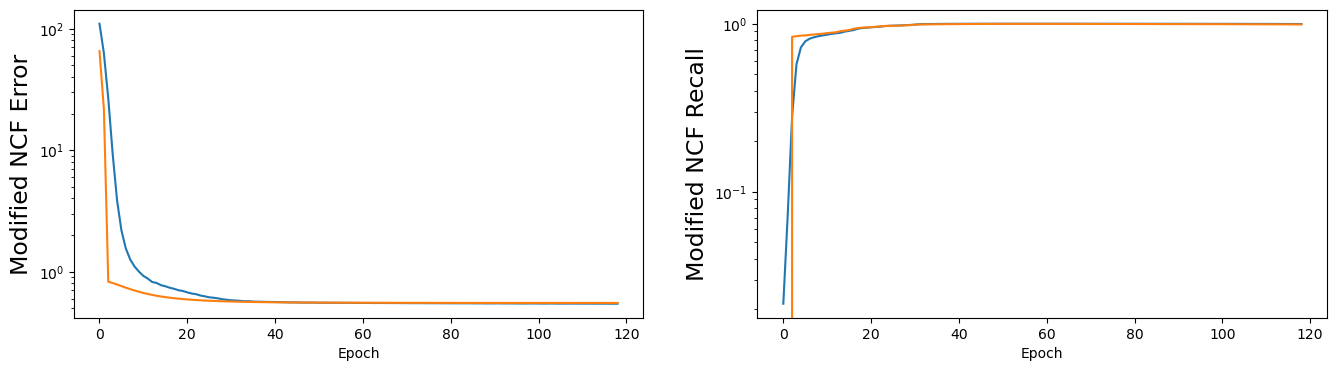

In [15]:
plt.figure(figsize=(25,4), facecolor='white')
plt.subplot(1,3,1)
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Modified NCF Error",  fontsize=17)

plt.subplot(1,3,2)
pd.Series(history.history['recall']).plot(logy=True)
pd.Series(history.history['val_recall']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Modified NCF Recall",  fontsize=17)

# plt.subplot(1,3,3)
# pd.Series(history.history['precision']).plot(logy=True)
# pd.Series(history.history['val_precision']).plot(logy=True)
# plt.xlabel("Epoch")
# plt.ylabel("Modified NCF Precision",  fontsize=17)
# # plt.savefig(f"model/{created_time}_{loss}_{lr}_{batch_size}/metrics.png")
# plt.show()

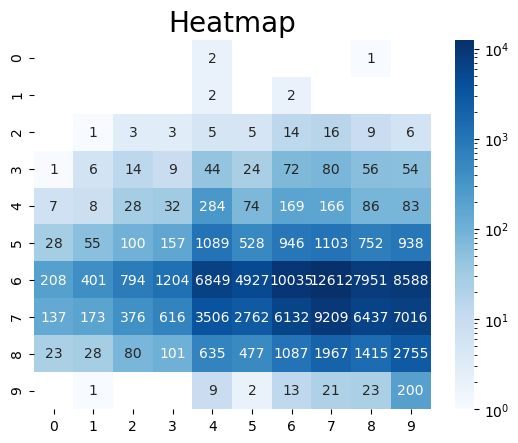

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label_pre = model.predict([dataset_val[:,0], dataset_val[:,1], dataset_val[:,2], dataset_val[:,3], dataset_val[:,4], dataset_val[:,5], dataset_val[:,6]])

label_esti = label_pre*10
label_true = label_val*10
label_true = label_true[:,np.newaxis]
label_esti = np.round(label_esti, 0)

result = confusion_matrix(label_esti, label_true)

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
plt.figure(facecolor='white')
ax = sns.heatmap(result, annot=True,fmt='d',cmap='Blues',norm=LogNorm())
plt.title('Heatmap', fontsize=20)
# plt.savefig(f"model/{created_time}_{loss}_{lr}_{batch_size}/heatmap.png")
plt.show()

In [17]:
label_esti

array([[7.],
       [7.],
       [8.],
       ...,
       [7.],
       [7.],
       [7.]], dtype=float32)